# Green peas: obtaining the data

In this notebook, we show how to use `astroquery` to download archival data that will become relevant to our project. I strongly recommend that you [read the documentation](http://astroquery.readthedocs.io/en/latest/) in order to understand how this works. Here I will provide a sample query of the Sloan Digital Sky Survey (SDSS) servers using SQL (Structured Query Language), but you can design your own queries directly using `astroquery` functions.

We are also interested in the science objective of identifying *green pea galaxies* (GPs). Before getting too deep into this project, it might be a good idea to skim the paper by [Cardamone et al. (2009, MNRAS)](http://adsabs.harvard.edu/abs/2009MNRAS.399.1191C).

In [1]:
from astroquery.sdss import SDSS

In [27]:
query_string = \
"""SELECT TOP 100000
    ra, dec,
    u, g, r, i, z,
    run, 
    rerun, 
    camcol, 
    field, 
    objID 
FROM Galaxy
"""

table = SDSS.query_sql(query_string)

Use selection criteria defined in Section 2.1 of the GP paper.

In [28]:
gps = table[(table['g'] <= 22) &
            (table['u'] - table['r'] <= 2.5) &
            (table['r'] - table['i'] <= -0.2) &
            (table['r'] - table['z'] <= 0.5) &
            (table['g'] - 2*table['r'] + table['i'] >= 0.5) &
            (table['u'] - table['r'] >= 2.5 * (table['r'] - table['z']))
           ]

gps

ra,dec,u,g,r,i,z,run,rerun,camcol,field,objID
float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
188.592658207176,61.259024502478,21.78524,21.97924,21.46208,23.0562,21.40891,2326,301,1,77,1237655463232602519
191.095938996004,61.1072005067478,22.22403,21.87533,21.24067,21.53605,21.00116,2326,301,1,85,1237655463233126913
191.324868083534,61.1752209070691,22.56513,21.82314,20.84803,21.06235,20.95731,2326,301,1,86,1237655463233192360
191.766456072133,61.1639344121204,22.60347,21.72822,21.31373,21.7695,21.60421,2326,301,1,87,1237655463233257928
193.524625631537,60.9713072624692,21.74233,20.59206,20.17636,20.4185,19.95795,2326,301,1,93,1237655463233651180
203.327879974432,60.0600615726305,21.05962,20.07219,19.50726,19.95317,19.11352,2326,301,1,126,1237655463235814135
228.892479391941,52.6005093434036,23.22157,21.89508,21.2089,21.40969,20.932,2326,301,1,232,1237655463242760615
237.839158829964,47.5469308751285,22.19204,21.82297,21.22698,21.48792,21.05612,2326,301,1,283,1237655463246103063
239.362417271484,46.6577562043382,22.68141,21.8697,21.43701,21.827,20.97224,2326,301,1,292,1237655463246692902


Let us take a look at some of these data.

In [60]:
from astropy.coordinates import SkyCoord

# examine first one (g-band imaging by default)
for ra, dec in gps[['ra', 'dec']][0:1]:
    images = SDSS.get_images(coordinates=SkyCoord(ra, dec, unit='deg'))

/home/john/anaconda2/envs/astrohack/lib/python3.6/site-packages/astropy/wcs/wcs.py:465: FITSFixedWarning: RADECSYS= 'ICRS ' / International Celestial Ref. System 
the RADECSYS keyword is deprecated, use RADESYSa.
  colsel=colsel)


INFO: Auto-setting vmin to -7.057e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.290e-01 [aplpy.core]


/home/john/anaconda2/envs/astrohack/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


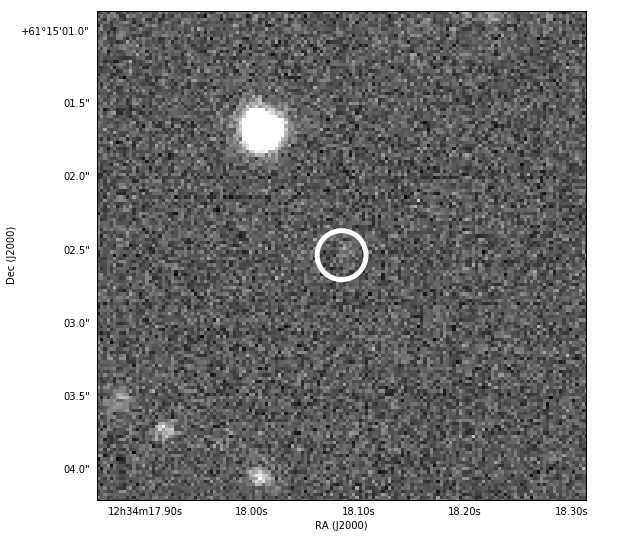

INFO: Auto-setting vmin to -8.040e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.199e-01 [aplpy.core]


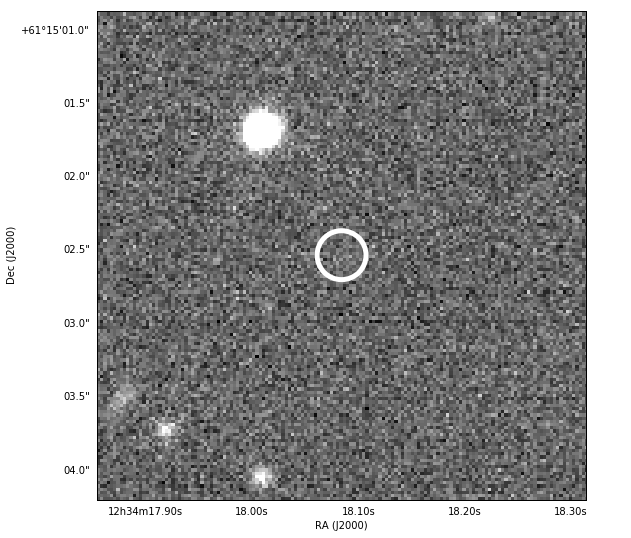

INFO: Auto-setting vmin to -7.473e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.227e-01 [aplpy.core]


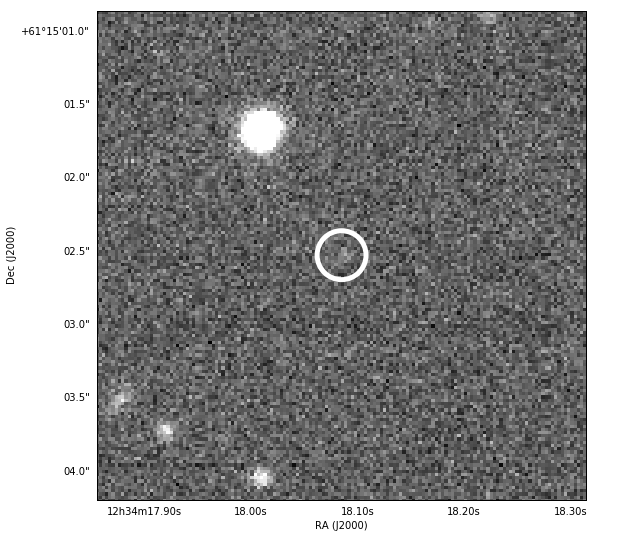

In [106]:
import aplpy
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ra, dec = gps[['ra', 'dec']][0]

for hdulist in images:
    im = hdulist['PRIMARY'].data
    header = hdulist['PRIMARY'].header
    
    fig = aplpy.FITSFigure(hdulist)
    fig.show_grayscale()
    
    # recenter image  
    fig.recenter(ra, dec, radius=30./3600)
    
    # draw 3 arcsec circle around GP candidate
    fig.show_circles(ra, dec, linewidth=5., radius=3./3600, edgecolor='white') 

    plt.show()